In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
pd.options.display.max_columns=None
plt.rcParams["figure.figsize"] = (10,5)
import time

# Load all the librarires
# for data manipulation and visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# preprocessing modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# modelling modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# modules for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score

#for model interpretation
#import shap

# deployment module
#import streamlit as st

print("All Libraries are imported")


All Libraries are imported


In [2]:
df=pd.read_csv('train_LZdllcl.csv')

<AxesSubplot:>

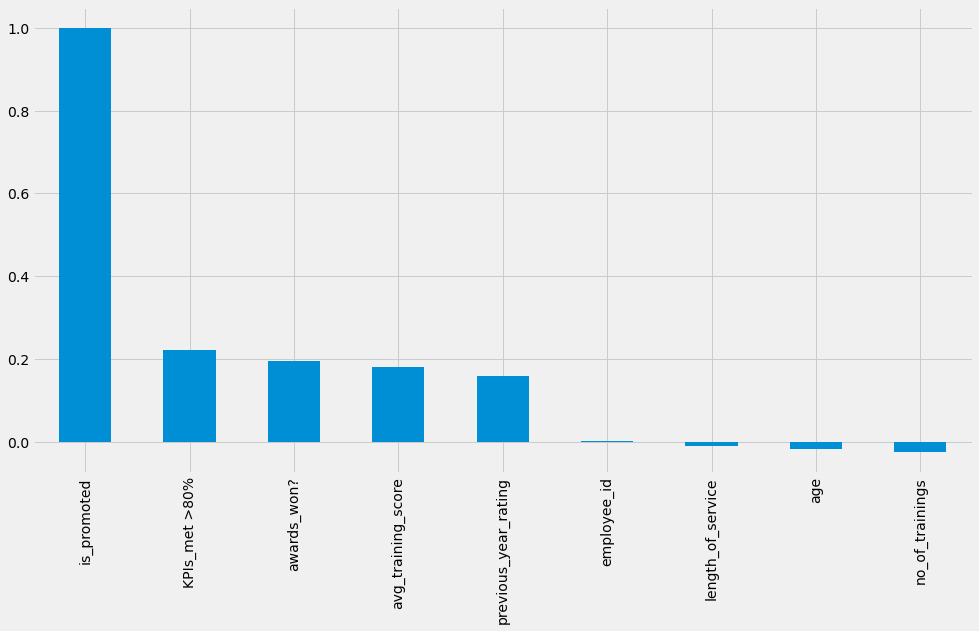

In [3]:
plt.figure(figsize=(15,8))
df.corr()['is_promoted'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

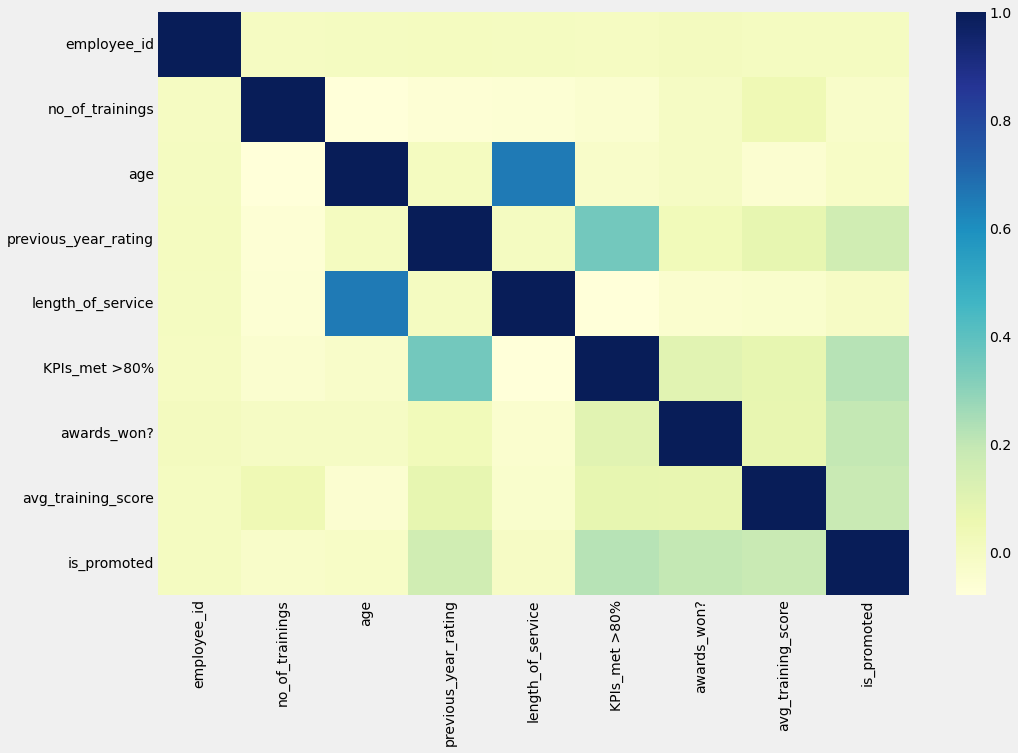

In [4]:
corr=df.corr().iloc[:,:] 
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=False,cmap="YlGnBu")

In [5]:
print('The number of rows in the dataset are:',df.shape[0])
print('The number of columns in the dataset are:',df.shape[1])

The number of rows in the dataset are: 54808
The number of columns in the dataset are: 14


In [6]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
df.isna().sum()/len(df)*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [8]:
df.education=df.education.replace(to_replace=np.nan, value=df.education.mode()[0])
df.previous_year_rating=df.previous_year_rating.replace(to_replace=np.nan, value=df.previous_year_rating.mode()[0])

In [9]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [10]:
df.drop(columns='employee_id',axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [12]:
df.age.value_counts()

30    3665
32    3534
31    3534
29    3405
33    3210
28    3147
34    3076
27    2827
35    2711
36    2517
37    2165
26    2060
38    1923
39    1695
40    1663
25    1299
41    1289
42    1149
43     992
44     847
24     845
45     760
46     697
48     557
47     557
50     521
49     441
23     428
51     389
53     364
52     351
54     313
55     294
56     264
57     238
22     231
60     217
58     213
59     209
20     113
21      98
Name: age, dtype: int64

* bin the age column into five intervals: 20-29, 30-39, 40-49, 50-59, and 60-69

In [13]:

age = df.age

bins = [19, 30, 40, 50, 61]
labels = ['20-29', '30-39', '40-49', '50-59']
age_group = pd.cut(age, bins=bins, labels=labels)

# print the updated series
print(age_group.value_counts())


30-39    26028
20-29    18118
40-49     7810
50-59     2852
Name: age, dtype: int64


In [14]:
sum(age_group.value_counts().values)

54808

In [15]:
df.age.shape

(54808,)

In [16]:
df.age=age_group

In [17]:
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,30-39,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,20-29,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,30-39,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,30-39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,40-49,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,40-49,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,30-39,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,20-29,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,20-29,1.0,2,0,0,45,0


### Mean encoding is a technique used to encode categorical variables with numerical values based on the mean of the target variable for each category

In [18]:
df.age.unique()

['30-39', '20-29', '40-49', '50-59']
Categories (4, object): ['20-29' < '30-39' < '40-49' < '50-59']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   department            54808 non-null  object  
 1   region                54808 non-null  object  
 2   education             54808 non-null  object  
 3   gender                54808 non-null  object  
 4   recruitment_channel   54808 non-null  object  
 5   no_of_trainings       54808 non-null  int64   
 6   age                   54808 non-null  category
 7   previous_year_rating  54808 non-null  float64 
 8   length_of_service     54808 non-null  int64   
 9   KPIs_met >80%         54808 non-null  int64   
 10  awards_won?           54808 non-null  int64   
 11  avg_training_score    54808 non-null  int64   
 12  is_promoted           54808 non-null  int64   
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 5.1+ MB


In [20]:
df.select_dtypes(exclude=np.number)

,department,region,education,gender,recruitment_channel,age
0,Sales & Marketing,region_7,Master's & above,f,sourcing,30-39
1,Operations,region_22,Bachelor's,m,other,20-29
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,30-39
3,Sales & Marketing,region_23,Bachelor's,m,other,30-39
4,Technology,region_26,Bachelor's,m,other,40-49
...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,40-49
54804,Operations,region_27,Master's & above,f,other,30-39
54805,Analytics,region_1,Bachelor's,m,other,20-29
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,20-29


In [21]:
df[['KPIs_met >80%','awards_won?','is_promoted']]=df[['KPIs_met >80%','awards_won?','is_promoted']].astype('object')
df['no_of_trainings']=df['no_of_trainings'].astype('object')

In [22]:
num=df.select_dtypes(include=np.number).columns


In [23]:
cat=df.select_dtypes(exclude=np.number).columns


In [24]:
for i in cat:
    print(i,'\n',df[i].unique())

department 
 ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region 
 ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education 
 ["Master's & above" "Bachelor's" 'Below Secondary']
gender 
 ['f' 'm']
recruitment_channel 
 ['sourcing' 'other' 'referred']
no_of_trainings 
 [1 2 3 4 7 5 6 8 10 9]
age 
 ['30-39', '20-29', '40-49', '50-59']
Categories (4, object): ['20-29' < '30-39' < '40-49' < '50-59']
KPIs_met >80% 
 [1 0]
awards_won? 
 [0 1]
is_promoted 
 [0 1]


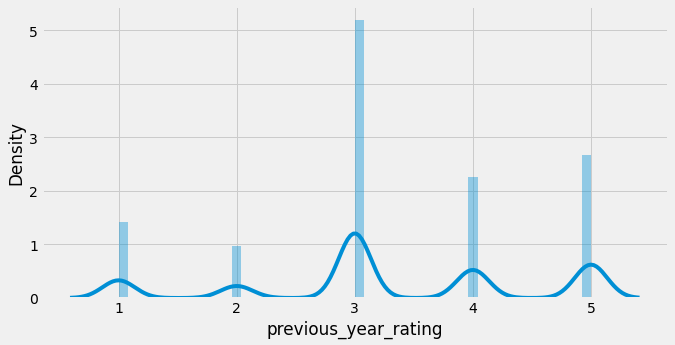

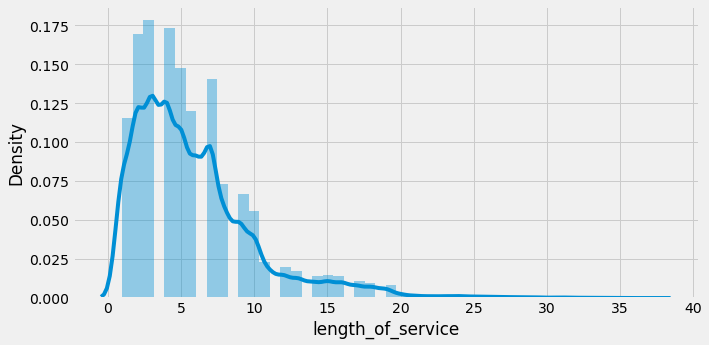

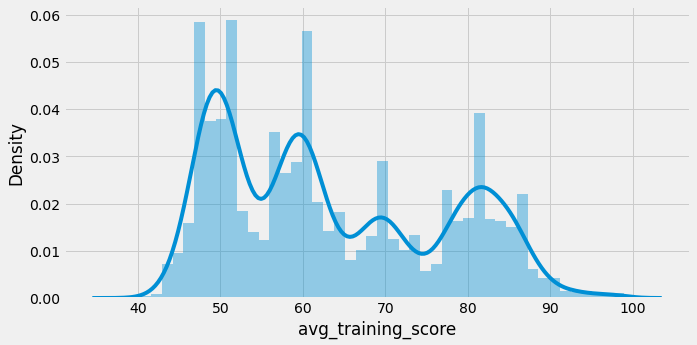

In [25]:
for i in df[num].columns:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.show()

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
previous_year_rating,54808.0,3.304481,1.214770,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0


In [27]:
df[cat].describe().T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,54808,3,Bachelor's,39078
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446
no_of_trainings,54808,10,1,44378
age,54808,4,30-39,26028
KPIs_met >80%,54808,2,0,35517
awards_won?,54808,2,0,53538
is_promoted,54808,2,0,50140


In [28]:
df[cat]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,KPIs_met >80%,awards_won?,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,30-39,1,0,0
1,Operations,region_22,Bachelor's,m,other,1,20-29,0,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,30-39,0,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,30-39,0,0,0
4,Technology,region_26,Bachelor's,m,other,1,40-49,0,0,0
...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,40-49,0,0,0
54804,Operations,region_27,Master's & above,f,other,1,30-39,0,0,0
54805,Analytics,region_1,Bachelor's,m,other,1,20-29,1,0,0
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,20-29,0,0,0


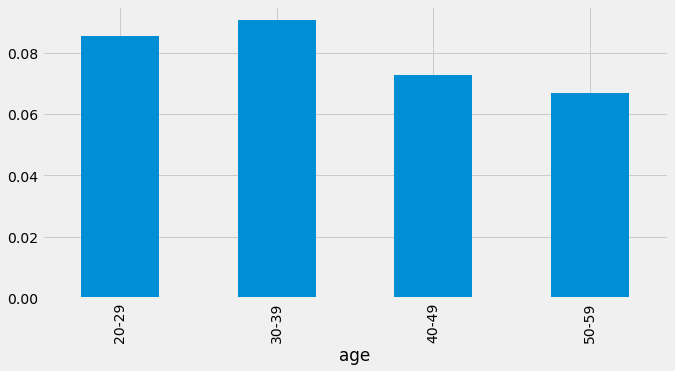

In [29]:
df.groupby(by='age')['is_promoted'].mean().plot(kind='bar')
plt.show()

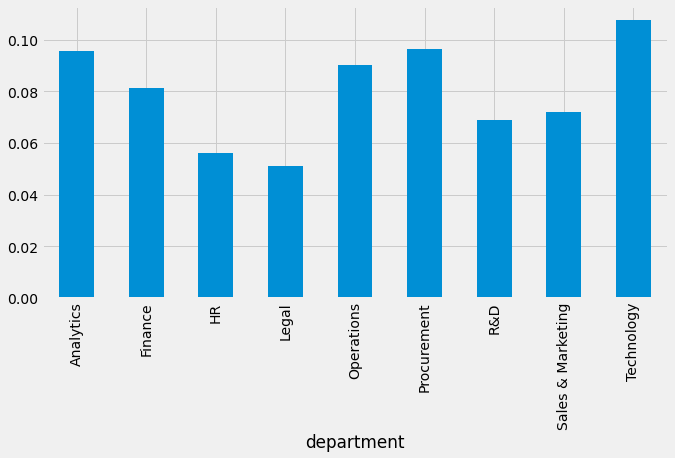

In [30]:
df.groupby(by='department')['is_promoted'].mean().plot(kind='bar')
plt.show()

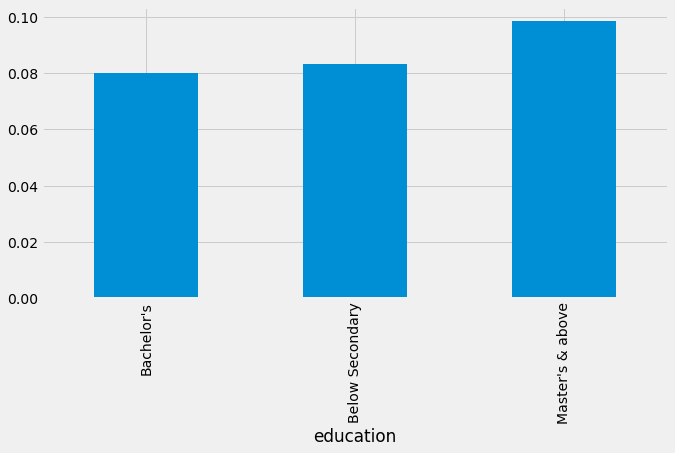

In [31]:
df.groupby(by='education')['is_promoted'].mean().plot(kind='bar')
plt.show()

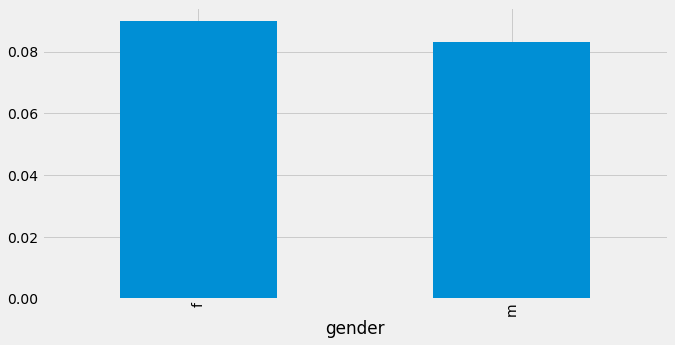

In [32]:
df.groupby(by='gender')['is_promoted'].mean().plot(kind='bar')
plt.show()

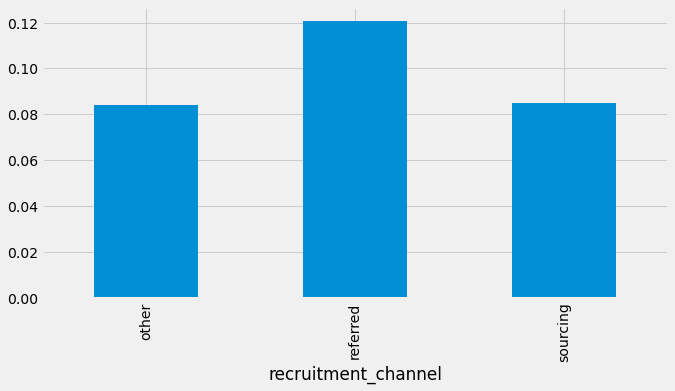

In [33]:

df.groupby(by='recruitment_channel')['is_promoted'].mean().plot(kind='bar')
plt.show()

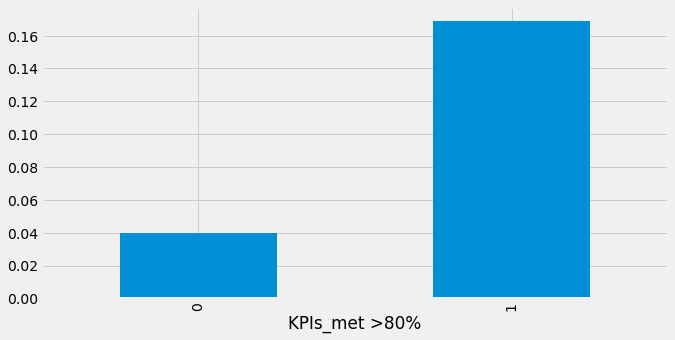

In [34]:

df.groupby(by='KPIs_met >80%')['is_promoted'].mean().plot(kind='bar')
plt.show()

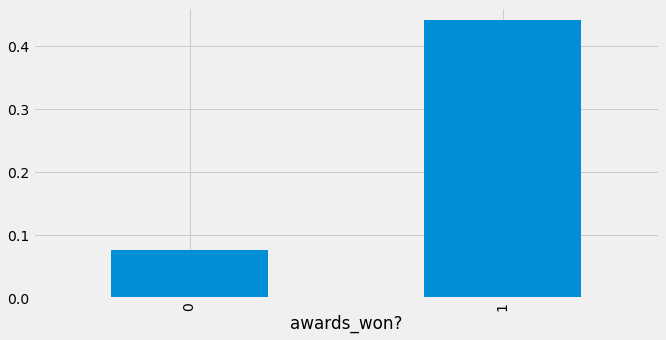

In [35]:

df.groupby(by='awards_won?')['is_promoted'].mean().plot(kind='bar')
plt.show()

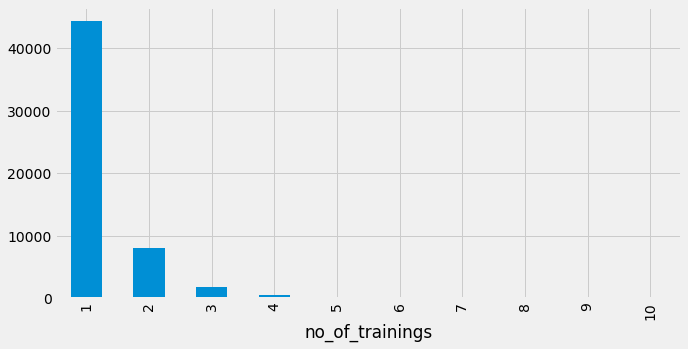

In [36]:
df.groupby(by='no_of_trainings')['is_promoted'].count().plot(kind='bar')
plt.show()

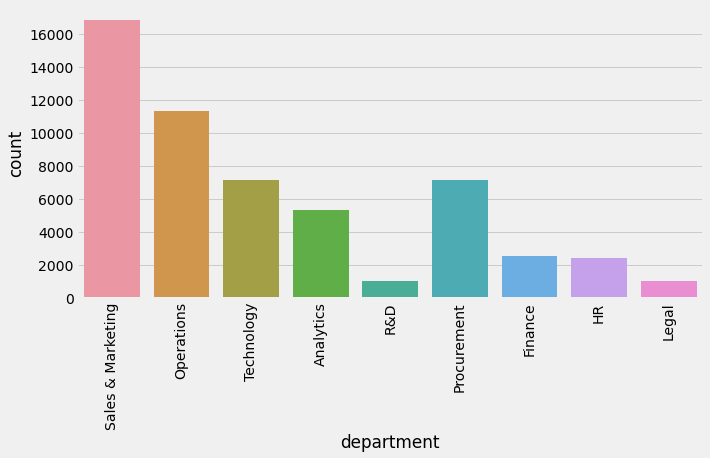

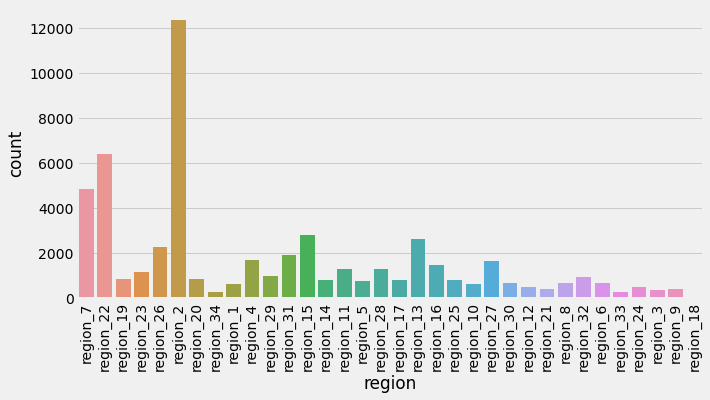

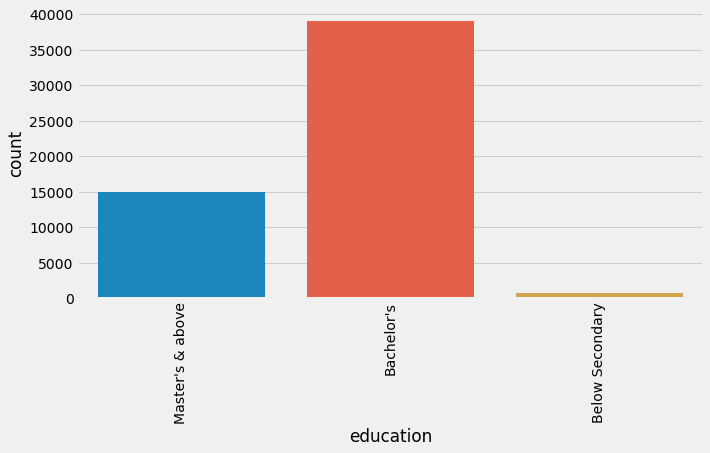

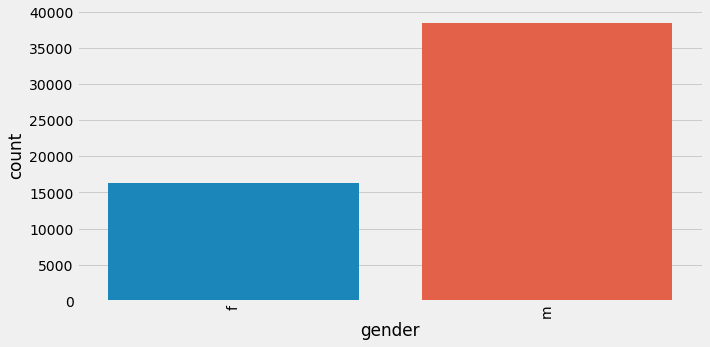

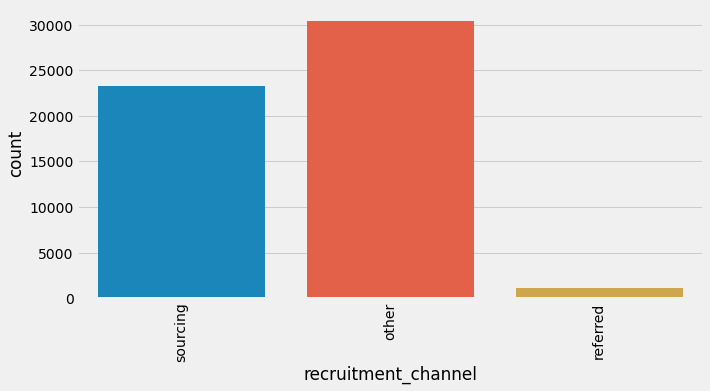

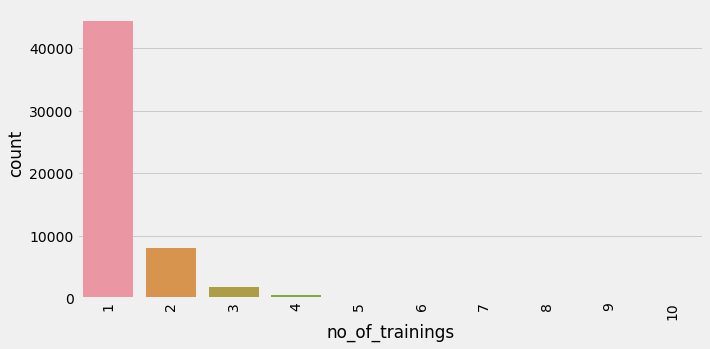

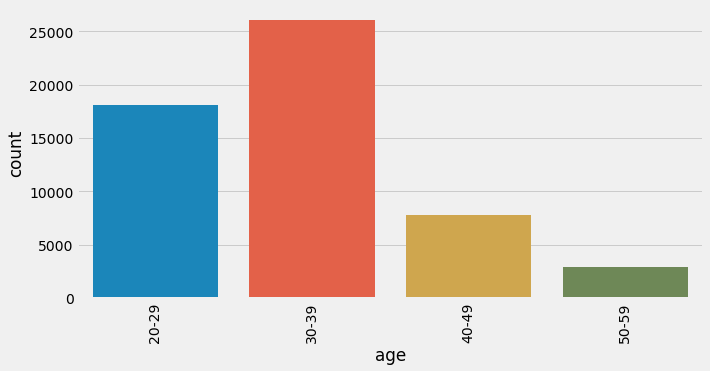

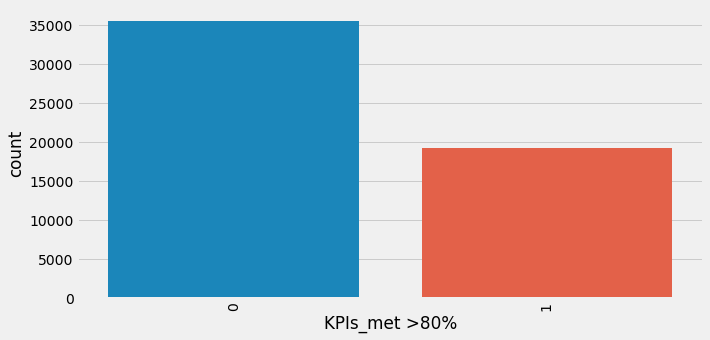

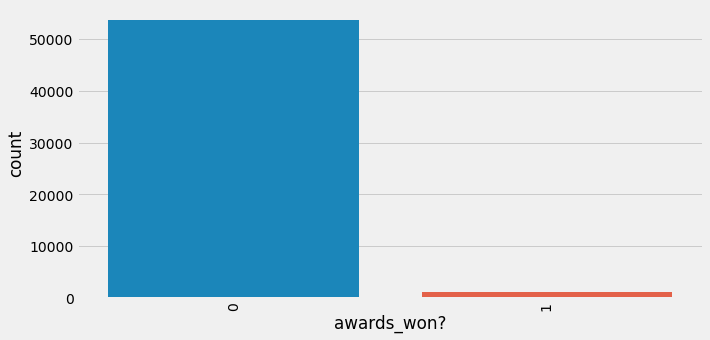

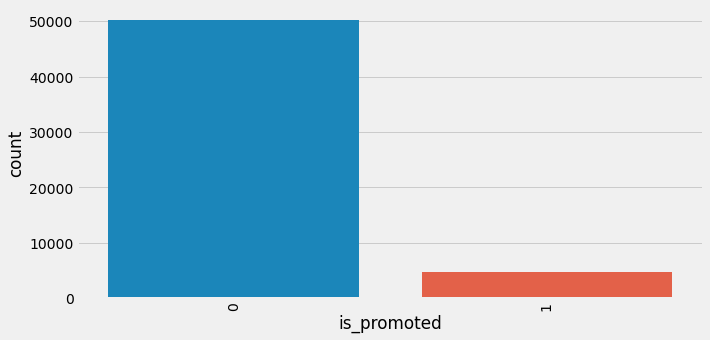

In [37]:
for i in cat:
    sns.countplot(x=df[i])
    plt.xticks(rotation = 90)
    plt.show()

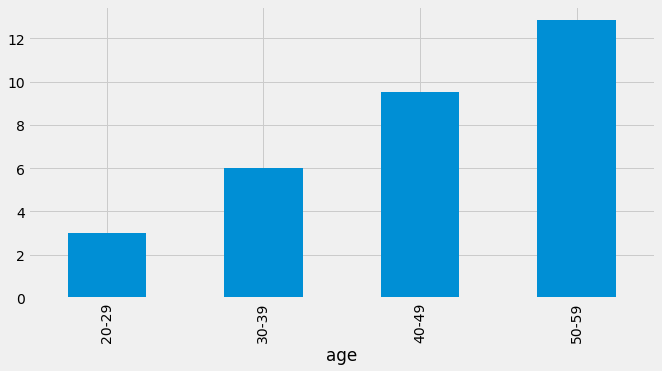

In [38]:
df.groupby(by='age')['length_of_service'].mean().plot(kind='bar')
plt.show()

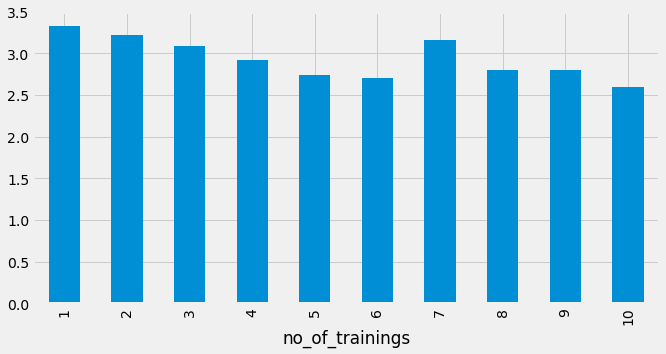

In [39]:
df.groupby(by='no_of_trainings')['previous_year_rating'].mean().plot(kind='bar')
plt.show()

In [40]:
df.no_of_trainings.unique()

array([1, 2, 3, 4, 7, 5, 6, 8, 10, 9], dtype=object)

In [41]:
df['tot_training_score']=df['no_of_trainings']*df['avg_training_score']


In [42]:
df['tot_training_score']=df['tot_training_score'].astype('int64')

In [43]:
df.drop(columns=['no_of_trainings','avg_training_score'],axis=1,inplace=True)

In [44]:
num=df.select_dtypes(include=np.number).columns
cat=df.select_dtypes(exclude=np.number).columns

In [45]:
df.head()

,department,region,education,gender,recruitment_channel,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,is_promoted,tot_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,30-39,5.0,8,1,0,0,49
1,Operations,region_22,Bachelor's,m,other,20-29,5.0,4,0,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,30-39,3.0,7,0,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,30-39,1.0,10,0,0,0,100
4,Technology,region_26,Bachelor's,m,other,40-49,3.0,2,0,0,0,73


In [46]:
cat

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'age', 'KPIs_met >80%', 'awards_won?', 'is_promoted'],
      dtype='object')

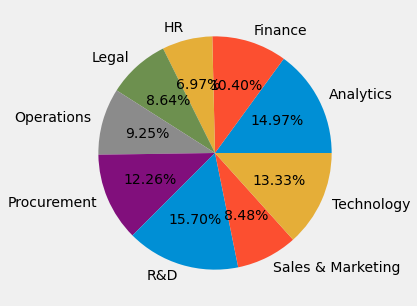

In [47]:
s=df.groupby(by='department')['tot_training_score'].mean()
plt.pie(s.values, labels = s.index,autopct='%.2f%%')
plt.show()

In [48]:
df[num].skew()

previous_year_rating   -0.260858
length_of_service       1.738061
tot_training_score      3.069118
dtype: float64

In [49]:
df.education.unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

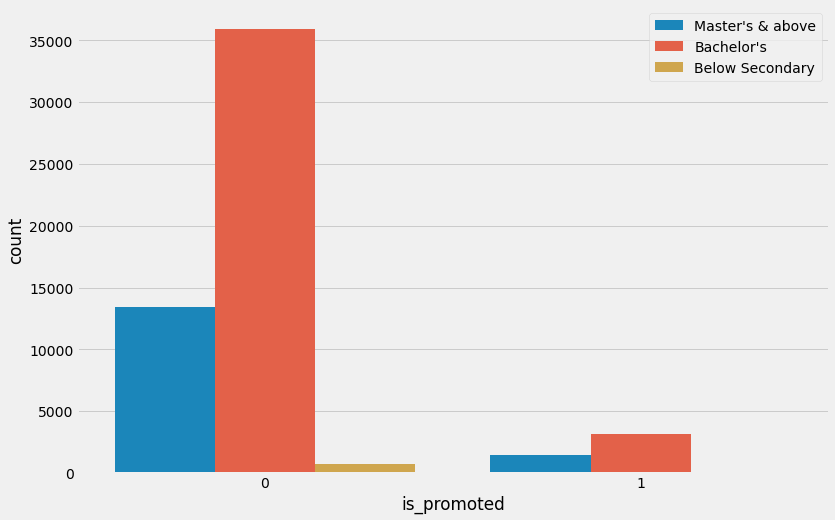

is_promoted,0,1
education,,
Below Secondary,0.91677,0.08323
Below Secondary,0.91677,0.08323
Below Secondary,0.91677,0.08323


In [50]:
plt.figure(figsize=(12, 8))
sns.countplot(x='is_promoted', hue='education', data=df)
plt.legend(loc='best')
plt.show()
pd.crosstab(df.education, 
            df.is_promoted, 
            normalize='index').reindex(index=['Below Secondary', 'Below Secondary', 'Below Secondary'])

In [51]:
from sklearn.preprocessing import PowerTransformer
p=PowerTransformer()
df[['length_of_service','tot_training_score']]=p.fit_transform(df[['length_of_service','tot_training_score']])

In [52]:
df[num].skew()

previous_year_rating   -0.260858
length_of_service       0.003095
tot_training_score      0.202568
dtype: float64

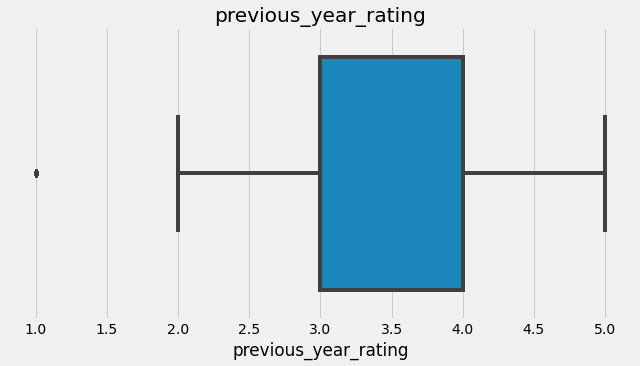

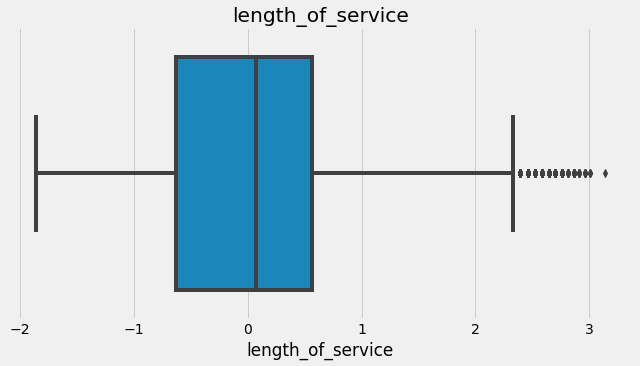

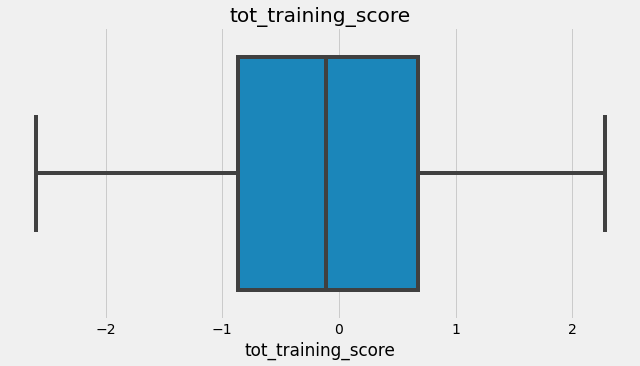

In [53]:
for i in num:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [54]:
cat

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'age', 'KPIs_met >80%', 'awards_won?', 'is_promoted'],
      dtype='object')

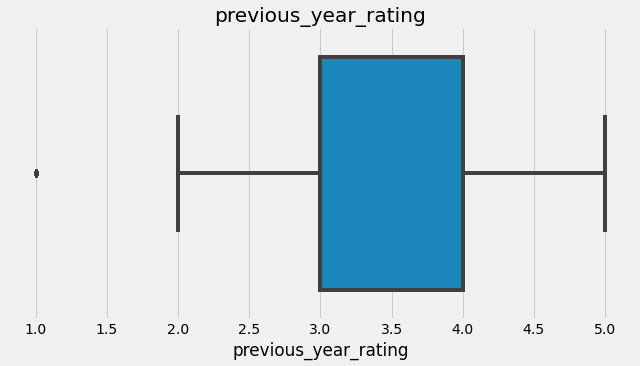

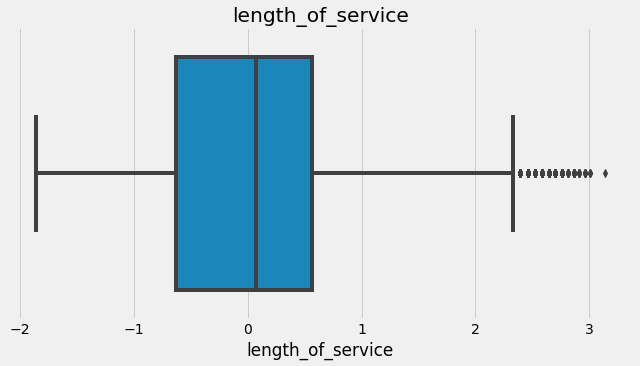

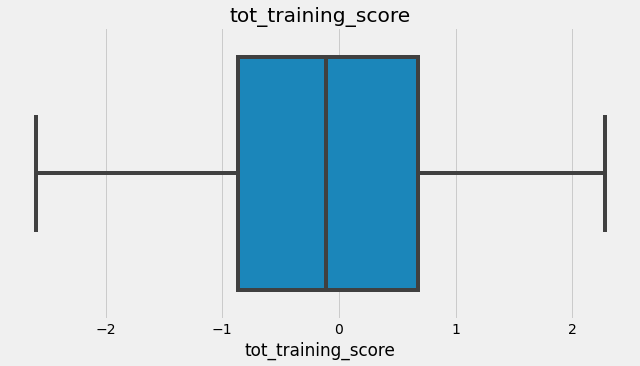

In [55]:
for i in num:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [56]:
num

Index(['previous_year_rating', 'length_of_service', 'tot_training_score'], dtype='object')

In [57]:
cat

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'age', 'KPIs_met >80%', 'awards_won?', 'is_promoted'],
      dtype='object')

<AxesSubplot:>

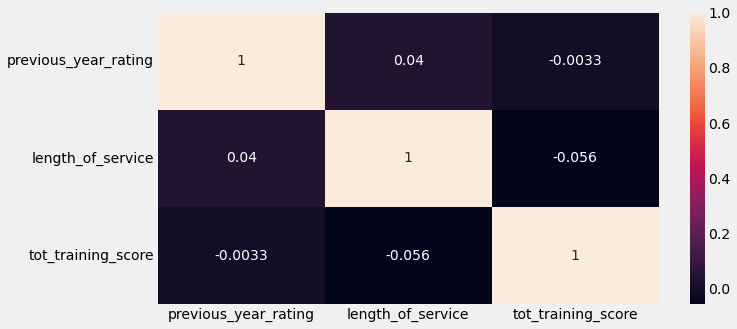

In [58]:
sns.heatmap(df.corr(),annot=True)

# STATISTICAL TESTS

#### Statistical Test to Determine a significant Relationship between independent variable and target:
* A Chisquare contingency test of independence is to be done with categorical columns the target, as our target is a categorical column.
* A 2 sample unpaired t test of independence is to be done with numerical columns against the target, as our target is a categorical column.
* Null Hypothesis : There is NO statistically significant relationship.
* Alternate Hypothesis : There is a statistically significant relationship.

In [59]:
from scipy import stats
for i in cat:
    if i not in ['is_promoted']:
        ct = pd.crosstab(df['is_promoted'], df[i])
        print('p_value for',i,':',round(stats.chi2_contingency(observed = ct)[1],2))

p_value for department : 0.0
p_value for region : 0.0
p_value for education : 0.0
p_value for gender : 0.01
p_value for recruitment_channel : 0.0
p_value for age : 0.0
p_value for KPIs_met >80% : 0.0
p_value for awards_won? : 0.0


In [60]:
for i in num:
    a = df[df['is_promoted'] == 0][i]
    b = df[df['is_promoted'] == 1][i]
    print('p_value for',i,':',round(stats.ttest_ind(a,b)[1],2))

p_value for previous_year_rating : 0.0
p_value for length_of_service : 0.12
p_value for tot_training_score : 0.0


* All columns with p_value < 0.05 are significant, except the column length_of_service. Its not significant

In [61]:
df=pd.get_dummies(data=df,columns=['age','department','region',
                                   'gender','recruitment_channel'],drop_first=True)

In [62]:
df

,education,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,is_promoted,tot_training_score,age_30-39,age_40-49,age_50-59,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,Master's & above,5.0,0.762071,1,0,0,-1.241981,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,Bachelor's,5.0,-0.246487,0,0,0,-0.349113,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Bachelor's,3.0,0.561785,0,0,0,-1.141239,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,Bachelor's,1.0,1.101233,0,0,0,1.044632,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Bachelor's,3.0,-1.141600,0,0,0,0.305897,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Bachelor's,3.0,1.922634,0,0,0,0.489587,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
54804,Master's & above,2.0,0.333625,0,0,0,-0.625547,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54805,Bachelor's,5.0,-0.635348,1,0,0,0.522996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
54806,Bachelor's,1.0,-1.141600,0,0,0,-1.698953,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1


In [63]:
df.isna().sum()

education                       0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
is_promoted                     0
tot_training_score              0
age_30-39                       0
age_40-49                       0
age_50-59                       0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_19                0
region_region_2                 0
region_region_

In [64]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Below Secondary', "Bachelor's", "Master's & above"]],dtype='int64')

df.education = encoder.fit_transform([[label] for label in df.education])

df.education

0        2
1        1
2        1
3        1
4        1
        ..
54803    1
54804    2
54805    1
54806    1
54807    1
Name: education, Length: 54808, dtype: int64

In [65]:
df

,education,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,is_promoted,tot_training_score,age_30-39,age_40-49,age_50-59,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,2,5.0,0.762071,1,0,0,-1.241981,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,5.0,-0.246487,0,0,0,-0.349113,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,3.0,0.561785,0,0,0,-1.141239,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,1,1.0,1.101233,0,0,0,1.044632,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,3.0,-1.141600,0,0,0,0.305897,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,3.0,1.922634,0,0,0,0.489587,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
54804,2,2.0,0.333625,0,0,0,-0.625547,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54805,1,5.0,-0.635348,1,0,0,0.522996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
54806,1,1.0,-1.141600,0,0,0,-1.698953,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1


In [66]:
df.corr()

,education,previous_year_rating,length_of_service,tot_training_score,age_30-39,age_40-49,age_50-59,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
education,1.000000,0.026852,0.303214,-0.002354,0.193181,0.200125,0.114424,-0.048139,-0.003394,-0.050323,0.006275,0.066485,0.049837,-0.014518,0.018012,0.081238,-0.014920,-0.040371,0.033659,-0.015313,-0.013463,-0.033818,0.001600,-0.013048,-0.030130,0.009868,0.003463,-0.016157,-0.009419,0.050228,-0.014947,0.013768,-0.051230,-0.035460,0.049050,-0.017780,0.014155,-0.034001,-0.018629,-0.059519,-0.000723,-0.018797,0.082890,-0.011364,-0.056706,0.042059,0.003308,0.001691,-0.024349,-0.032963,-0.000715
previous_year_rating,0.026852,1.000000,0.040352,-0.003334,0.036814,0.006918,0.001056,0.026371,0.022876,0.004036,0.124059,-0.007515,0.023559,-0.132583,-0.050312,-0.005045,0.003004,-0.002724,0.004464,0.000640,0.004974,-0.010994,0.012634,-0.012912,0.004422,0.002222,0.002819,-0.007859,0.011381,0.005935,-0.043053,0.013820,-0.006808,-0.011496,0.016343,-0.024949,0.011312,-0.008149,-0.014012,-0.007008,-0.016314,-0.020201,0.034579,-0.025491,-0.014157,0.020395,0.006713,-0.033911,-0.024024,0.065856,-0.003831
length_of_service,0.303214,0.040352,1.000000,-0.056191,0.189426,0.319318,0.280764,-0.058745,-0.016883,-0.054360,0.078181,0.044131,-0.037297,0.004876,-0.002959,0.003890,-0.015329,-0.040716,0.023780,0.009805,0.036432,-0.004311,0.013507,-0.011862,0.028074,0.139345,-0.020384,-0.009021,-0.095765,0.016025,-0.024763,-0.023308,-0.032133,-0.033244,-0.021352,-0.030825,-0.004087,-0.016431,-0.029627,-0.044550,0.016383,-0.025842,0.035661,-0.014793,-0.044439,0.032719,-0.029967,-0.042167,-0.022102,-0.030636,0.001988
tot_training_score,-0.002354,-0.003334,-0.056191,1.000000,0.001791,-0.064519,-0.034773,0.015140,-0.227701,-0.036692,-0.057820,0.189217,0.140386,-0.457321,0.305513,-0.010679,-0.012070,-0.017423,-0.028456,-0.028020,-0.015057,-0.024478,0.001489,-0.022263,-0.015827,0.028459,-0.020594,-0.011363,0.100256,0.004049,0.004251,-0.018311,0.001196,0.004653,-0.021858,0.003237,-0.039915,-0.020676,0.000275,-0.012139,0.005153,-0.007561,-0.020540,0.013013,-0.024095,0.015800,-0.018271,-0.013962,0.020729,0.007897,-0.010661
age_30-39,0.193181,0.036814,0.189426,0.001791,1.000000,-0.387669,-0.222809,-0.022147,-0.022826,-0.007613,0.046340,0.022060,0.027198,-0.013084,-0.016262,0.030175,0.017791,-0.014391,0.022062,0.030050,0.041181,0.015694,0.004271,-0.002646,0.047525,-0.089185,0.013702,0.005005,-0.066841,0.064830,0.012107,0.017184,-0.019894,0.002378,0.037465,-0.002476,0.008620,0.004027,0.007539,-0.007235,0.009020,-0.009872,0.026375,0.014078,-0.024144,0.022668,0.001999,-0.025330,-0.018901,0.000427,-0.000151
age_40-49,0.200125,0.006918,0.319318,-0.064519,-0.387669,1.000000,-0.095509,-0.052271,-0.011580,-0.016479,0.060150,0.014400,-0.028622,0.024363,-0.007002,-0.013684,-0.019914,-0.029782,0.025965,-0.003787,0.023880,-0.008659,0.012029,-0.009698,0.015607,0.134221,-0.029621,-0.008208,-0.056611,-0.018175,-0.035072,-0.037732,-0.007887,-0.020839,-0.037755,-0.034281,-0.004154,-0.022840,-0.019439,-0.041565,-0.006223,-0.026249,0.032887,-0.015630,-0.030581,0.039334,-0.027060,-0.035224,0.020140,-0.031694,0.000973
age_50-59,0.114424,0.001056,0.280764,-0.034773,-0.222809,-0.095509,1.000000,-0.024623,0.017672,-0.000642,0.00638

<AxesSubplot:>

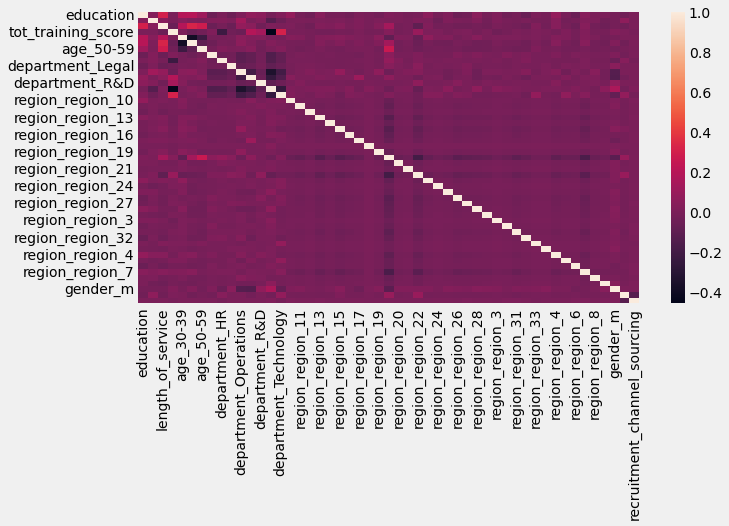

In [67]:
sns.heatmap(df.corr())

In [68]:
df.is_promoted=df.is_promoted.astype('int64')

# SAMPLING

In [69]:
df.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

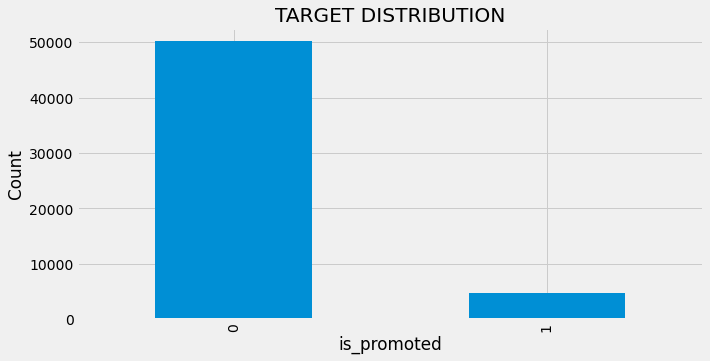

In [70]:
df.is_promoted.value_counts().plot(kind='bar')
plt.title('TARGET DISTRIBUTION')
plt.xlabel('is_promoted')
plt.ylabel('Count')
plt.show()

In [71]:
d0=df[df.is_promoted==0]
d1=df[df.is_promoted!=0]
df_0=d0.sample(n=5000, random_state=42)
df_sample_under=pd.concat([df_0,d1],axis=0)

In [72]:
df_sample_under.shape

(9668, 54)

In [73]:
x=df_sample_under.drop(columns='is_promoted')
y=df_sample_under['is_promoted']

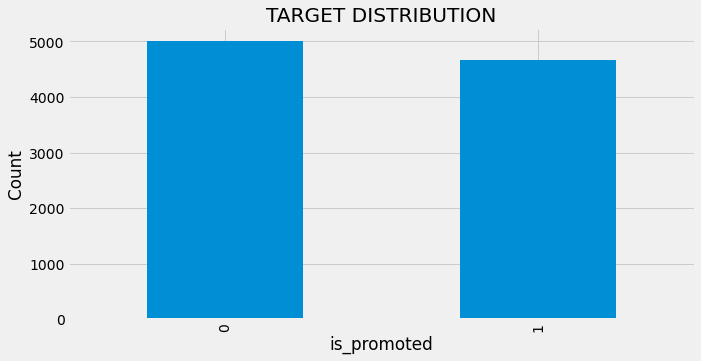

In [74]:
df_sample_under.is_promoted.value_counts().plot(kind='bar')
plt.title('TARGET DISTRIBUTION')
plt.xlabel('is_promoted')
plt.ylabel('Count')
plt.show()

# Dataset and preprocessing
Before fitting the models,The following excercises are performed.Data wrangling, preprocessing, exploration and visualization. The dataset used in this project is the human resource analytics data from a live hackathon on Analytics vidhya:https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/. It comprises 54,808 observations and 14 variables. There were missing values which were treated. The target variable is 'is_promoted, with 1 indicating Promoted and 0 non-promoted. Irrelevant variables(employee Id) was dropped, features were standardised to the same scale ,categorical variables are converted using the Ordinal Encoding and dummy encoding and also,examined the correlation between the features. there is no high correlation between them. 

# TRAIN TEST SPLIT

In [75]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=12)

In [76]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((6767, 53), (2901, 53), (6767,), (2901,))

In [77]:
xtrain.describe()

,education,previous_year_rating,length_of_service,tot_training_score,age_30-39,age_40-49,age_50-59,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
count,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.00000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000
mean,1.278262,3.566573,-0.006856,0.123136,0.492094,0.131964,0.046697,0.049062,0.037535,0.016846,0.211172,0.134919,0.016994,0.282843,0.148367,0.009901,0.020393,0.010197,0.050835,0.013152,0.046697,0.026009,0.018176,0.000443,0.015812,0.221516,0.011231,0.006207,0.134181,0.029260,0.007832,0.018029,0.036205,0.029703,0.026895,0.015516,0.00798,0.012413,0.032067,0.012561,0.002956,0.003399,0.037535,0.013595,0.009162,0.095316,0.010197,0.003842,0.700458,0.026304,0.416433
std,0.480638,1.176537,0.988967,0.970446,0.499974,0.338477,0.211005,0.216013,0.190083,0.128705,0.408170,0.341663,0.129259,0.450414,0.355490,0.099017,0.141351,0.100469,0.219677,0.113934,0.211005,0.159172,0.133599,0.021052,0.124757,0.415298,0.105387,0.078543,0.340871,0.168546,0.088159,0.133065,0.186814,0.169779,0.161789,0.123604,0.08898,0.110729,0.176192,0.111378,0.054288,0.058205,0.190083,0.115813,0.095286,0.293672,0.100469,0.061871,0.458091,0.160050,0.493003
min,0.000000,1.000000,-1.864650,-2.426275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,-0.635348,-0.552082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,0.068781,0.180416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,5.000000,0.561785,0.757498,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [78]:
xtrain_sc=xtrain.copy()
xtest_sc=xtest.copy()

In [79]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
xtrain_sc[['previous_year_rating', 
           'length_of_service', 
           'tot_training_score']]=s.fit_transform(xtrain[['previous_year_rating', 
                                                          'length_of_service', 
                                                          'tot_training_score']])
xtest_sc[['previous_year_rating', 
          'length_of_service', 
          'tot_training_score']]=s.transform(xtest[['previous_year_rating', 
                                                    'length_of_service', 
                                                    'tot_training_score']])


In [80]:
xtrain_sc.describe()

,education,previous_year_rating,length_of_service,tot_training_score,age_30-39,age_40-49,age_50-59,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
count,6767.000000,6.767000e+03,6.767000e+03,6.767000e+03,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.00000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000
mean,1.278262,3.216234e-16,1.751878e-16,-1.613736e-16,0.492094,0.131964,0.046697,0.049062,0.037535,0.016846,0.211172,0.134919,0.016994,0.282843,0.148367,0.009901,0.020393,0.010197,0.050835,0.013152,0.046697,0.026009,0.018176,0.000443,0.015812,0.221516,0.011231,0.006207,0.134181,0.029260,0.007832,0.018029,0.036205,0.029703,0.026895,0.015516,0.00798,0.012413,0.032067,0.012561,0.002956,0.003399,0.037535,0.013595,0.009162,0.095316,0.010197,0.003842,0.700458,0.026304,0.416433
std,0.480638,1.000074e+00,1.000074e+00,1.000074e+00,0.499974,0.338477,0.211005,0.216013,0.190083,0.128705,0.408170,0.341663,0.129259,0.450414,0.355490,0.099017,0.141351,0.100469,0.219677,0.113934,0.211005,0.159172,0.133599,0.021052,0.124757,0.415298,0.105387,0.078543,0.340871,0.168546,0.088159,0.133065,0.186814,0.169779,0.161789,0.123604,0.08898,0.110729,0.176192,0.111378,0.054288,0.058205,0.190083,0.115813,0.095286,0.293672,0.100469,0.061871,0.458091,0.160050,0.493003
min,0.000000,-2.181626e+00,-1.878658e+00,-2.627244e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-4.815956e-01,-6.355495e-01,-6.958325e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,-4.815956e-01,7.648664e-02,5.902823e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,1.218434e+00,5.750277e-01,6.537285e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [81]:
xtest_sc.describe()

,education,previous_year_rating,length_of_service,tot_training_score,age_30-39,age_40-49,age_50-59,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
count,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.0,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000,2901.000000
mean,1.269562,-0.008681,-0.014380,0.030851,0.487418,0.135126,0.048259,0.042744,0.034816,0.015857,0.224061,0.139952,0.014133,0.277491,0.155808,0.011375,0.020683,0.008273,0.044467,0.015167,0.057566,0.023785,0.016201,0.0,0.015167,0.217166,0.016546,0.005171,0.143744,0.024130,0.005171,0.016891,0.037573,0.030679,0.028956,0.013444,0.004137,0.010686,0.029645,0.008962,0.002758,0.005515,0.048259,0.015167,0.009652,0.085832,0.012754,0.003792,0.677697,0.025164,0.413995
std,0.478216,1.015861,1.006331,0.988496,0.499928,0.341917,0.214350,0.202314,0.183344,0.124942,0.417034,0.346997,0.118060,0.447838,0.362736,0.106065,0.142344,0.090595,0.206167,0.122239,0.232962,0.152405,0.126271,0.0,0.122239,0.412388,0.127585,0.071733,0.350890,0.153478,0.071733,0.128884,0.190195,0.172476,0.167710,0.115185,0.064194,0.102837,0.169635,0.094261,0.052450,0.074073,0.214350,0.122239,0.097785,0.280165,0.112231,0.061471,0.467439,0.156649,0.492633
min,0.000000,-2.181626,-1.878658,-2.459896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-0.481596,-0.635550,-0.695833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,-0.481596,0.076487,0.059028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,1.218434,0.575028,0.680253,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [82]:
xtrain=xtrain_sc

In [83]:
xtest=xtest_sc

In [84]:
xtrain.describe()

,education,previous_year_rating,length_of_service,tot_training_score,age_30-39,age_40-49,age_50-59,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
count,6767.000000,6.767000e+03,6.767000e+03,6.767000e+03,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.00000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000,6767.000000
mean,1.278262,3.216234e-16,1.751878e-16,-1.613736e-16,0.492094,0.131964,0.046697,0.049062,0.037535,0.016846,0.211172,0.134919,0.016994,0.282843,0.148367,0.009901,0.020393,0.010197,0.050835,0.013152,0.046697,0.026009,0.018176,0.000443,0.015812,0.221516,0.011231,0.006207,0.134181,0.029260,0.007832,0.018029,0.036205,0.029703,0.026895,0.015516,0.00798,0.012413,0.032067,0.012561,0.002956,0.003399,0.037535,0.013595,0.009162,0.095316,0.010197,0.003842,0.700458,0.026304,0.416433
std,0.480638,1.000074e+00,1.000074e+00,1.000074e+00,0.499974,0.338477,0.211005,0.216013,0.190083,0.128705,0.408170,0.341663,0.129259,0.450414,0.355490,0.099017,0.141351,0.100469,0.219677,0.113934,0.211005,0.159172,0.133599,0.021052,0.124757,0.415298,0.105387,0.078543,0.340871,0.168546,0.088159,0.133065,0.186814,0.169779,0.161789,0.123604,0.08898,0.110729,0.176192,0.111378,0.054288,0.058205,0.190083,0.115813,0.095286,0.293672,0.100469,0.061871,0.458091,0.160050,0.493003
min,0.000000,-2.181626e+00,-1.878658e+00,-2.627244e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-4.815956e-01,-6.355495e-01,-6.958325e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,-4.815956e-01,7.648664e-02,5.902823e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,1.218434e+00,5.750277e-01,6.537285e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

# BASE MODEL

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
LGB_model=LogisticRegression(random_state=42)
LGB_model.fit(xtrain,ytrain)
ypred=LGB_model.predict(xtest)
print('confusion_matrix:\n',confusion_matrix(ytest,ypred))
print('\nclassification_report:\n',classification_report(ytest,ypred))
print('Train score: ',LGB_model.score(xtrain,ytrain))
print('Test score: ',LGB_model.score(xtest,ytest))

confusion_matrix:
 [[1071  423]
 [ 394 1013]]

classification_report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.72      1494
           1       0.71      0.72      0.71      1407

    accuracy                           0.72      2901
   macro avg       0.72      0.72      0.72      2901
weighted avg       0.72      0.72      0.72      2901

Train score:  0.724841140830501
Test score:  0.7183729748362634


# FEATURE ELIMINATION

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
x=df_sample_under.drop(columns='is_promoted')
y=df_sample_under.is_promoted
lr=LinearRegression()
rfe=RFE(estimator=lr)
rfe_model=rfe.fit(x,y)
rfe_model.ranking_

array([17,  1, 28,  1,  1,  1, 22, 15, 11, 14,  3, 18,  4,  6,  1,  1,  5,
       27,  1,  1, 10,  9,  7,  1,  1,  1,  1,  8,  1,  1, 26, 12,  1,  1,
        2,  1, 20,  1, 23, 13,  1,  1,  1,  1,  1,  1,  1, 19, 16,  1, 25,
       21, 24])

In [87]:
ranking=pd.DataFrame(rfe_model.ranking_,columns=['Rank'],index=x.columns)

In [88]:
ranking[ranking['Rank']==1]

,Rank
previous_year_rating,1
KPIs_met >80%,1
awards_won?,1
tot_training_score,1
department_R&D,1
department_Sales & Marketing,1
region_region_11,1
region_region_12,1
region_region_16,1
region_region_17,1


In [89]:
ranking[ranking['Rank']==1].index

Index(['previous_year_rating', 'KPIs_met >80%', 'awards_won?',
       'tot_training_score', 'department_R&D', 'department_Sales & Marketing',
       'region_region_11', 'region_region_12', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_20', 'region_region_21', 'region_region_24',
       'region_region_25', 'region_region_27', 'region_region_29',
       'region_region_31', 'region_region_32', 'region_region_33',
       'region_region_34', 'region_region_4', 'region_region_5',
       'region_region_6', 'region_region_9'],
      dtype='object')

In [90]:
x=df_sample_under[list(ranking[ranking['Rank']==1].index)]
y=df_sample_under.is_promoted
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=13)

In [91]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=13)

In [92]:
xtrain[['KPIs_met >80%','awards_won?']]=xtrain[['KPIs_met >80%','awards_won?']].astype('int64')

In [93]:
xtest[['KPIs_met >80%','awards_won?']]=xtest[['KPIs_met >80%','awards_won?']].astype('int64')

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
LGB_model=LogisticRegression(random_state=42)
LGB_model.fit(xtrain,ytrain)
ypred=LGB_model.predict(xtest)
print('confusion_matrix\n',confusion_matrix(ytest,ypred))
print('classification_report\n',classification_report(ytest,ypred))
print('Train score: ',LGB_model.score(xtrain,ytrain))
print('Test score: ',LGB_model.score(xtest,ytest))

confusion_matrix
 [[1073  425]
 [ 413  990]]
classification_report
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      1498
           1       0.70      0.71      0.70      1403

    accuracy                           0.71      2901
   macro avg       0.71      0.71      0.71      2901
weighted avg       0.71      0.71      0.71      2901

Train score:  0.7164179104477612
Test score:  0.7111340916925198


In [95]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6767 entries, 37249 to 30017
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   previous_year_rating          6767 non-null   float64
 1   KPIs_met >80%                 6767 non-null   int64  
 2   awards_won?                   6767 non-null   int64  
 3   tot_training_score            6767 non-null   float64
 4   department_R&D                6767 non-null   uint8  
 5   department_Sales & Marketing  6767 non-null   uint8  
 6   region_region_11              6767 non-null   uint8  
 7   region_region_12              6767 non-null   uint8  
 8   region_region_16              6767 non-null   uint8  
 9   region_region_17              6767 non-null   uint8  
 10  region_region_18              6767 non-null   uint8  
 11  region_region_19              6767 non-null   uint8  
 12  region_region_20              6767 non-null   uint8  
 13

In [96]:
from xgboost import XGBClassifier
XGB_model=XGBClassifier(random_state=100)
XGB_model.fit(xtrain,ytrain)
ypred=XGB_model.predict(xtest)
print('confusion_matrix\n',confusion_matrix(ytest,ypred))
print('classification_report\n',classification_report(ytest,ypred))
print('Train score: ',XGB_model.score(xtrain,ytrain))
print('Test score: ',XGB_model.score(xtest,ytest))

confusion_matrix
 [[1093  405]
 [ 247 1156]]
classification_report
               precision    recall  f1-score   support

           0       0.82      0.73      0.77      1498
           1       0.74      0.82      0.78      1403

    accuracy                           0.78      2901
   macro avg       0.78      0.78      0.78      2901
weighted avg       0.78      0.78      0.77      2901

Train score:  0.8330131520614749
Test score:  0.7752499138228197


In [97]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2901 entries, 35761 to 52582
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   previous_year_rating          2901 non-null   float64
 1   KPIs_met >80%                 2901 non-null   int64  
 2   awards_won?                   2901 non-null   int64  
 3   tot_training_score            2901 non-null   float64
 4   department_R&D                2901 non-null   uint8  
 5   department_Sales & Marketing  2901 non-null   uint8  
 6   region_region_11              2901 non-null   uint8  
 7   region_region_12              2901 non-null   uint8  
 8   region_region_16              2901 non-null   uint8  
 9   region_region_17              2901 non-null   uint8  
 10  region_region_18              2901 non-null   uint8  
 11  region_region_19              2901 non-null   uint8  
 12  region_region_20              2901 non-null   uint8  
 13

In [98]:
# function to print metrics
def print_metrics(ytest,ypred,model):
    print('Metrics for the model',model)
    print(' ')
    print("Accuracy score is ",accuracy_score(ytest,ypred))
    print(' ')
    print("recall score is ",recall_score(ytest,ypred))
    print(' ')
    print('precision score is',precision_score(ytest,ypred))
    print(' ')
    print('f1 score is', f1_score(ytest,ypred))
    print(' ')
    print(' Roc score is ',roc_auc_score(ytest,ypred))
    print(' ')
    print('Confusion matrix \n', confusion_matrix(ytest,ypred))
    print(' ')
    print('Classification report \n',classification_report(ytest,ypred))

In [99]:
#lets select the best model based on f1 score and optimize it
import time
clfs={
    'KNN': KNeighborsClassifier(),
    'NaiveBayes':GaussianNB(),
    'Logregs':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoosting':GradientBoostingClassifier(),
    'XGBoost':XGBClassifier()
}
models_report=pd.DataFrame(columns=['Model','accuracy','F1_score','Train score','Test score','Time_taken'])

for clf,clf_name in list(zip(clfs.values(),clfs.keys())):
    start_time = time.time()
    clf.fit(xtrain,ytrain)
    end_time = time.time()
    ypred=clf.predict(xtest)
    print('Fitting the model.....', clf_name)
    t={
        'Model':clf_name,
        'accuracy':accuracy_score(ytest,ypred),
        'F1_score':f1_score(ytest,ypred),
        'Train score':clf.score(xtrain,ytrain),
        'Test score':clf.score(xtest,ytest),
        'Precision score':precision_score(ytest,ypred),
        'Recall score':recall_score(ytest,ypred),
        'Time_taken':end_time - start_time
    }
    
    models_report=models_report.append(t,ignore_index=True)
models_report











Fitting the model..... KNN
Fitting the model..... NaiveBayes
Fitting the model..... Logregs
Fitting the model..... DecisionTree
Fitting the model..... RandomForest
Fitting the model..... AdaBoost
Fitting the model..... GradientBoosting
Fitting the model..... XGBoost


,Model,accuracy,F1_score,Train score,Test score,Time_taken,Precision score,Recall score
0,KNN,0.749052,0.753053,0.809812,0.749052,0.004856,0.718447,0.791162
1,NaiveBayes,0.545329,0.659085,0.544111,0.545329,0.014558,0.517032,0.908767
2,Logregs,0.711134,0.702626,0.716418,0.711134,0.108068,0.699647,0.705631
3,DecisionTree,0.742158,0.734564,0.87838,0.742158,0.046987,0.731449,0.737705
4,RandomForest,0.757325,0.758076,0.87838,0.757325,0.934865,0.731918,0.786172
5,AdaBoost,0.721131,0.697344,0.739914,0.721131,0.3237,0.733858,0.664291
6,GradientBoosting,0.77525,0.784534,0.789124,0.77525,0.567604,0.731362,0.846044
7,XGBoost,0.77525,0.780027,0.833013,0.77525,0.443461,0.740551,0.823949


In [100]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model=GradientBoostingClassifier(random_state=100)
GB_model.fit(xtrain,ytrain)
ypred=GB_model.predict(xtest)
print('accuracy:',accuracy_score(ytest,ypred))
print('f1_score:',f1_score(ytest,ypred))
print('Train score',GB_model.score(xtrain,ytrain))
print('Test score',GB_model.score(xtest,ytest))
print('Precision score',precision_score(ytest,ypred))
print('Recall score',recall_score(ytest,ypred))

accuracy: 0.774905205101689
f1_score: 0.7841322314049587
Train score 0.7891236884882518
Test score 0.774905205101689
Precision score 0.7311960542540074
Recall score 0.8453314326443335


In [101]:
info=pd.DataFrame(GB_model.feature_importances_,columns=['Information_Gain'],index=xtrain.columns)
info

,Information_Gain
previous_year_rating,0.183630
KPIs_met >80%,0.354423
awards_won?,0.086531
tot_training_score,0.292819
department_R&D,0.002326
department_Sales & Marketing,0.058052
region_region_11,0.002389
region_region_12,0.000833
region_region_16,0.000336
region_region_17,0.000187


In [102]:
info=pd.DataFrame(GB_model.feature_importances_,columns=['Information_Gain'],index=xtrain.columns)
info

,Information_Gain
previous_year_rating,0.183630
KPIs_met >80%,0.354423
awards_won?,0.086531
tot_training_score,0.292819
department_R&D,0.002326
department_Sales & Marketing,0.058052
region_region_11,0.002389
region_region_12,0.000833
region_region_16,0.000336
region_region_17,0.000187


In [103]:
list(info[info['Information_Gain']>0.005].index)

['previous_year_rating',
 'KPIs_met >80%',
 'awards_won?',
 'tot_training_score',
 'department_Sales & Marketing']

In [104]:
GB_model=GradientBoostingClassifier()
GB_model.fit(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain)
ypred=GB_model.predict(xtest[list(info[info['Information_Gain']>0.005].index)])
print('accuracy:',accuracy_score(ytest,ypred))
print('f1_score:',f1_score(ytest,ypred))
print('Train score',GB_model.score(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain))
print('Test score',GB_model.score(xtest[list(info[info['Information_Gain']>0.005].index)],ytest))
print('Precision score',precision_score(ytest,ypred))
print('Recall score',recall_score(ytest,ypred))

accuracy: 0.7776628748707343
f1_score: 0.7895595432300162
Train score 0.7857248411408305
Test score 0.7776628748707343
Precision score 0.7280385078219013
Recall score 0.8624376336421953


# HYPER PARAMETER TUNING -GB

In [105]:
params = {'learning_rate':[0.5,0.6,0.7],
          'n_estimators':[100,150,160],
         'min_samples_split':[2,3,5],
         'max_depth':[3,5,7]}

In [106]:
grid = GridSearchCV(estimator = GB_model, param_grid=params,cv=5,scoring='f1')
grid.fit(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain)
grid.best_params_

{'learning_rate': 0.5,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [107]:
GB_model=GradientBoostingClassifier(learning_rate= 0.5,max_depth= 3,min_samples_split= 2,n_estimators= 100)
GB_model.fit(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain)
ypred=GB_model.predict(xtest[list(info[info['Information_Gain']>0.005].index)])
print('accuracy:',accuracy_score(ytest,ypred))
print('f1_score:',f1_score(ytest,ypred))
print('Train score',GB_model.score(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain))
print('Test score',GB_model.score(xtest[list(info[info['Information_Gain']>0.005].index)],ytest))
print('Precision score',precision_score(ytest,ypred))
print('Recall score',recall_score(ytest,ypred))

accuracy: 0.7783522923129955
f1_score: 0.789249426417568
Train score 0.8058223732821044
Test score 0.7783522923129955
Precision score 0.7305825242718447
Recall score 0.8581610833927299


# HYPER PARAMETER TUNING -XGB

In [109]:
params = {'learning_rate':[0.5,0.6,0.7],
          'n_estimators':[100,150,160],
         'min_samples_split':[2,3,5],
         'max_depth':[3,5,7]}

In [115]:

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
}

# Create an XGBClassifier instance
xgb_model = XGBClassifier(random_state=42)

# Define the GridSearchCV object
grid_search = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the GridSearchCV object to the data
grid_search.fit(xtrain[list(info[info['Information_Gain']>0.005].index)], ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [116]:
grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 7,
 'min_child_weight': 5,
 'n_estimators': 500}

# TEST DATA

In [117]:
df_test=pd.read_csv('test_2umaH9m.csv')

In [118]:
print('The number of rows in the dataset are:',df_test.shape[0])
print('The number of columns in the dataset are:',df_test.shape[1])

The number of rows in the dataset are: 23490
The number of columns in the dataset are: 13


In [119]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [120]:
df_test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [121]:
df_test.education=df_test.education.replace(to_replace=np.nan, value=df_test.education.mode()[0])
df_test.previous_year_rating=df_test.previous_year_rating.replace(to_replace=np.nan, value=df_test.previous_year_rating.mode()[0])

In [122]:
df_test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [123]:
df2=df_test.drop(columns=['employee_id'],axis=1)

In [124]:

age = df2.age

bins = [19, 30, 40, 50, 61]
labels = ['20-29', '30-39', '40-49', '50-59']
age_group = pd.cut(age, bins=bins, labels=labels)

# print the updated series
print(age_group.value_counts())

30-39    11093
20-29     7828
40-49     3321
50-59     1248
Name: age, dtype: int64


In [125]:
df2.age=age_group

In [126]:
df2[['KPIs_met >80%','awards_won?']]=df2[['KPIs_met >80%','awards_won?']].astype('object')
df2['no_of_trainings']=df2['no_of_trainings'].astype('object')

In [127]:
num=df2.select_dtypes(include=np.number).columns
cat=df2.select_dtypes(exclude=np.number).columns

In [128]:
df2['tot_training_score']=df2['no_of_trainings']*df2['avg_training_score']

df2['tot_training_score']=df2['tot_training_score'].astype('int64')
df2.drop(columns=['no_of_trainings','avg_training_score'],axis=1,inplace=True)

In [129]:
num=df2.select_dtypes(include=np.number).columns
cat=df2.select_dtypes(exclude=np.number).columns

In [130]:
df2[num].skew()

previous_year_rating   -0.272367
length_of_service       1.703001
tot_training_score      3.019686
dtype: float64

In [131]:
from sklearn.preprocessing import PowerTransformer
p=PowerTransformer()
df2[['tot_training_score','length_of_service']]=p.fit_transform(df2[['tot_training_score','length_of_service']])

In [132]:
df2[num].skew()

previous_year_rating   -0.272367
length_of_service       0.002984
tot_training_score      0.202963
dtype: float64

In [133]:
df2=pd.get_dummies(data=df2,columns=['age','department','region','gender','recruitment_channel'],drop_first=True)

In [134]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Below Secondary', "Bachelor's", "Master's & above"]],dtype='int64')

df2.education = encoder.fit_transform([[label] for label in df2.education])

df2.education

0        1
1        1
2        1
3        1
4        1
        ..
23485    0
23486    1
23487    1
23488    1
23489    2
Name: education, Length: 23490, dtype: int64

In [135]:
GB_model1=GradientBoostingClassifier(learning_rate= 0.5,max_depth= 3,min_samples_split= 2,n_estimators= 100)
GB_model1.fit(xtrain[list(info[info['Information_Gain']>0.005].index)],ytrain)
ypred=GB_model1.predict(df2[list(info[info['Information_Gain']>0.005].index)])

In [136]:
df_output=pd.DataFrame()

In [137]:
df_output['employee_id']=df_test['employee_id']

In [138]:
df_output['is_promoted']=pd.Series(ypred)

In [139]:
df_output.head()

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0


# SUBMISSION FILE

In [140]:
df_output.to_csv('Output.csv', index=False)